<a href="https://colab.research.google.com/github/fjadidi2001/Image_Inpaint/blob/main/DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install tensorflow pillow numpy matplotlib scikit-image opencv-python

In [10]:
from google.colab import files
uploaded = files.upload()  # This will prompt you to upload your image

Saving Mona_Lisa.jpg to Mona_Lisa.jpg


Generator Summary:


Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_19            │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_56 (Conv2D)        │ (None, 128, 128, 64)   │          3,136 │ input_layer_19[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_76            │ (None, 128, 128, 64)   │              0 │ conv2d_56[0][0]        │
│ (LeakyReLU)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_57 (Conv2D)        │ (None, 64, 64, 128)    │        131,200 │ leaky_re_lu_76[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_12    │ (None, 64, 64, 128)    │            512 │ conv2d_57[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_77            │ (None, 64, 64, 128)    │              0 │ batch_normalization_1… │
│ (LeakyReLU)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_58 (Conv2D)        │ (None, 32, 32, 256)    │        524,544 │ leaky_re_lu_77[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_13    │ (None, 32, 32, 256)    │          1,024 │ conv2d_58[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_78            │ (None, 32, 32, 256)    │              0 │ batch_normalization_1… │
│ (LeakyReLU)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_59 (Conv2D)        │ (None, 16, 16, 512)    │      2,097,664 │ leaky_re_lu_78[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_14    │ (None, 16, 16, 512)    │          2,048 │ conv2d_59[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_79            │ (None, 16, 16, 512)    │              0 │ batch_normalization_1… │
│ (LeakyReLU)               │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose_29       │ (None, 32, 32, 256)    │      2,097,408 │ leaky_re_lu_79[0][0]   │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_15    │ (None, 32, 32, 256)    │          1,024 │ conv2d_transpose_29[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_6 (Dropout)  

 Total params: 6,176,387 (23.56 MB)

 Trainable params: 6,173,699 (23.55 MB)

 Non-trainable params: 2,688 (10.50 KB)


Discriminator Summary:


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)                   │ (None, 128, 128, 64)        │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_83 (LeakyReLU)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 64, 64, 128)         │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_84 (LeakyReLU)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_62 (Conv2D)                   │ (None, 32, 32, 256)         │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_85 (LeakyReLU)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 262144)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │         262,145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 921,025 (3.51 MB)

 Trainable params: 921,025 (3.51 MB)

 Non-trainable params: 0 (0.00 B)

Starting training with 1 images for 100 epochs


Epoch 0: Gen Loss = 24.6329, Disc Loss = 1.3963


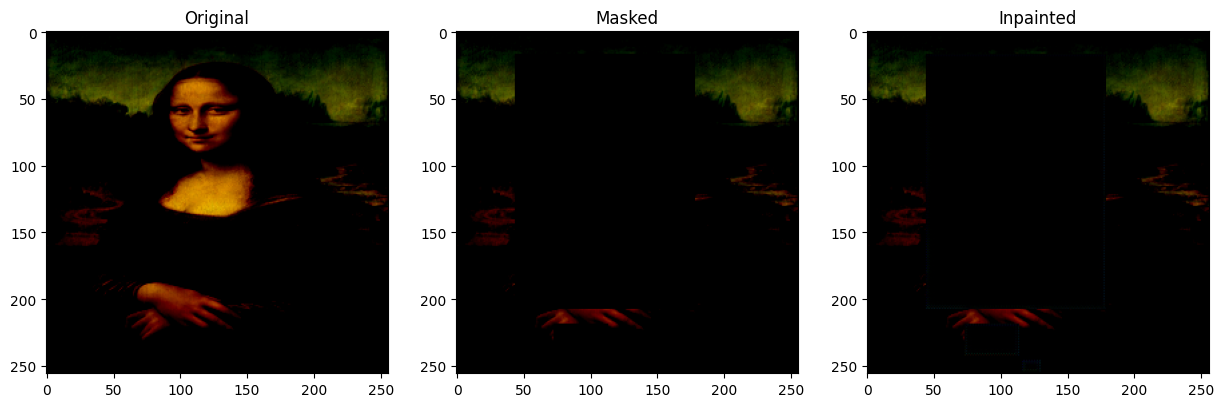

Epoch 10: Gen Loss = 8.3098, Disc Loss = 1.2225
Epoch 20: Gen Loss = 16.8733, Disc Loss = 0.7791
Epoch 30: Gen Loss = 2.5203, Disc Loss = 1.3861
Epoch 40: Gen Loss = 9.4284, Disc Loss = 0.7973


Epoch 50: Gen Loss = 5.7965, Disc Loss = 0.7150


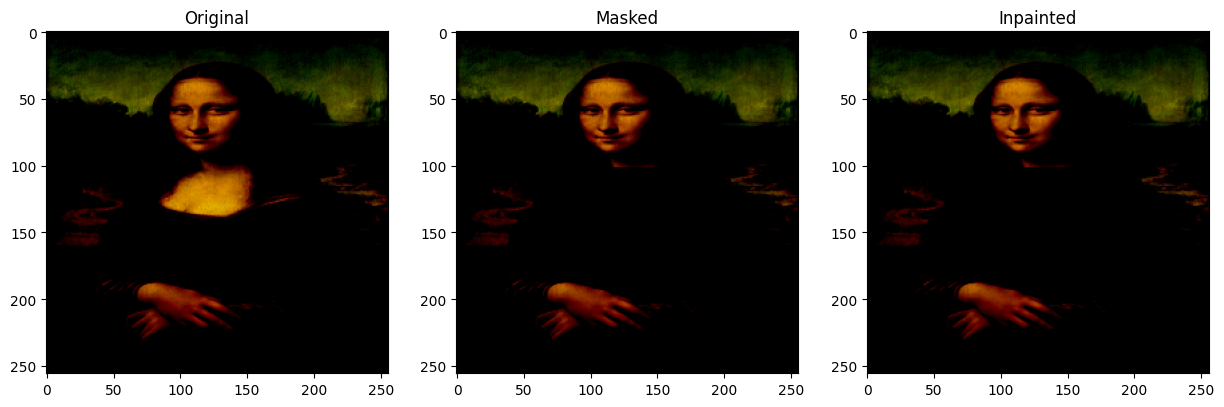

Epoch 60: Gen Loss = 2.4444, Disc Loss = 1.3096
Epoch 70: Gen Loss = 3.6187, Disc Loss = 1.1414
Epoch 80: Gen Loss = 2.6649, Disc Loss = 1.9896
Epoch 90: Gen Loss = 2.1262, Disc Loss = 2.5134


PSNR: 10.73
SSIM: 0.59


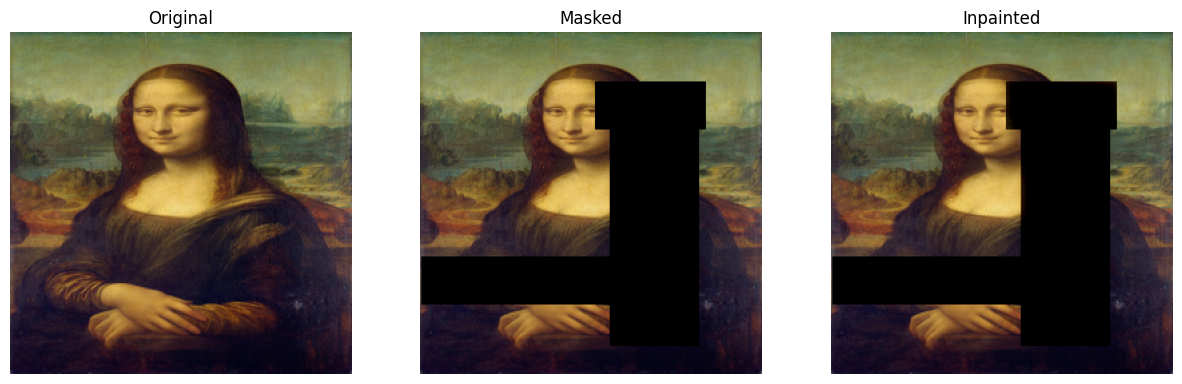

In [19]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from PIL import Image
import cv2

# Step 1: Load and prepare data
def load_image(image_path, size=(256, 256)):
    """Load and resize image"""
    img = Image.open(image_path)
    img = img.resize(size)
    img = np.array(img) / 255.0  # Normalize to [0,1]
    return img

def load_dataset(directory, size=(256, 256)):
    """Load all images from directory"""
    images = []
    for filename in os.listdir(directory):
        if filename.endswith((".png", ".jpg", ".jpeg")):
            img_path = os.path.join(directory, filename)
            img = load_image(img_path, size)
            images.append(img)
    return np.array(images)

# Step 2: Preprocess images
def preprocess_images(images):
    """Preprocess images for the model"""
    # Convert to float32
    images = images.astype('float32')
    # Ensure values are in [-1, 1]
    images = (images * 2) - 1
    return images

# Step 3: Create mask
def create_random_mask(shape, max_boxes=5):
    """Create random rectangular masks"""
    mask = np.ones(shape, dtype=np.float32)  # Specify dtype as float32
    for _ in range(np.random.randint(1, max_boxes)):
        x1, x2 = sorted(np.random.randint(0, shape[1], 2))
        y1, y2 = sorted(np.random.randint(0, shape[0], 2))
        mask[y1:y2, x1:x2] = 0
    return mask

# Step 4: Define Generator and Discriminator
def build_generator():
    """Create the generator model with U-Net architecture"""
    # Encoder
    inputs = layers.Input(shape=(256, 256, 3))

    # Encoder blocks
    e1 = layers.Conv2D(64, 4, strides=2, padding='same')(inputs)
    e1 = layers.LeakyReLU(0.2)(e1)

    e2 = layers.Conv2D(128, 4, strides=2, padding='same')(e1)
    e2 = layers.BatchNormalization()(e2)
    e2 = layers.LeakyReLU(0.2)(e2)

    e3 = layers.Conv2D(256, 4, strides=2, padding='same')(e2)
    e3 = layers.BatchNormalization()(e3)
    e3 = layers.LeakyReLU(0.2)(e3)

    e4 = layers.Conv2D(512, 4, strides=2, padding='same')(e3)
    e4 = layers.BatchNormalization()(e4)
    e4 = layers.LeakyReLU(0.2)(e4)

    # Decoder blocks with skip connections
    d1 = layers.Conv2DTranspose(256, 4, strides=2, padding='same')(e4)
    d1 = layers.BatchNormalization()(d1)
    d1 = layers.Dropout(0.5)(d1)
    d1 = layers.concatenate([d1, e3])
    d1 = layers.LeakyReLU(0.2)(d1)

    d2 = layers.Conv2DTranspose(128, 4, strides=2, padding='same')(d1)
    d2 = layers.BatchNormalization()(d2)
    d2 = layers.Dropout(0.5)(d2)
    d2 = layers.concatenate([d2, e2])
    d2 = layers.LeakyReLU(0.2)(d2)

    d3 = layers.Conv2DTranspose(64, 4, strides=2, padding='same')(d2)
    d3 = layers.BatchNormalization()(d3)
    d3 = layers.Dropout(0.5)(d3)
    d3 = layers.concatenate([d3, e1])
    d3 = layers.LeakyReLU(0.2)(d3)

    output = layers.Conv2DTranspose(3, 4, strides=2, padding='same', activation='tanh')(d3)

    return tf.keras.Model(inputs=inputs, outputs=output)

def build_discriminator():
    """Create the discriminator model"""
    model = tf.keras.Sequential([
        layers.Input(shape=(256, 256, 3)),
        layers.Conv2D(64, 4, strides=2, padding='same'),
        layers.LeakyReLU(0.2),
        layers.Conv2D(128, 4, strides=2, padding='same'),
        layers.LeakyReLU(0.2),
        layers.Conv2D(256, 4, strides=2, padding='same'),
        layers.LeakyReLU(0.2),
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Step 5: Combine into DCGAN
class DCGAN(tf.keras.Model):
    def __init__(self):
        super(DCGAN, self).__init__()
        self.generator = build_generator()
        self.discriminator = build_discriminator()

        # Load VGG model for perceptual loss
        vgg = tf.keras.applications.VGG16(include_top=False, weights='imagenet')
        self.vgg = tf.keras.Model(inputs=vgg.input,
                                outputs=vgg.get_layer('block3_conv3').output)
        self.vgg.trainable = False

        # Optimizers
        self.gen_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
        self.disc_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

        # Loss
        self.cross_entropy = tf.keras.losses.BinaryCrossentropy()
        self.l1_loss = tf.keras.losses.MeanAbsoluteError()

    def perceptual_loss(self, real, generated):
        real_features = self.vgg(real)
        gen_features = self.vgg(generated)
        return tf.reduce_mean(tf.abs(real_features - gen_features))

    @tf.function
    def train_step(self, images, masks):
        batch_size = tf.shape(images)[0]

        with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
            # Generate images
            masked_images = images * masks
            generated_images = self.generator(masked_images, training=True)

            # Combine real and generated images
            filled_images = masked_images + (1 - masks) * generated_images

            # Train discriminator
            real_output = self.discriminator(images, training=True)
            fake_output = self.discriminator(filled_images, training=True)

            # Calculate losses
            l1_loss = self.l1_loss(images, filled_images) * 100
            perc_loss = self.perceptual_loss(images, filled_images) * 0.1
            gen_adv_loss = self.cross_entropy(tf.ones_like(fake_output), fake_output)

            gen_loss = l1_loss + perc_loss + gen_adv_loss

            disc_loss = self.cross_entropy(tf.ones_like(real_output), real_output) + \
                       self.cross_entropy(tf.zeros_like(fake_output), fake_output)

        # Apply gradients
        gen_gradients = gen_tape.gradient(gen_loss, self.generator.trainable_variables)
        disc_gradients = disc_tape.gradient(disc_loss, self.discriminator.trainable_variables)

        self.gen_optimizer.apply_gradients(zip(gen_gradients, self.generator.trainable_variables))
        self.disc_optimizer.apply_gradients(zip(disc_gradients, self.discriminator.trainable_variables))

        return gen_loss, disc_loss
# Step 6: Training function
def train_model(model, dataset, epochs=500, batch_size=1):  # Increased epochs
    """Train the model"""
    print(f"Starting training with {len(dataset)} images for {epochs} epochs")

    for epoch in range(epochs):
        for batch in range(0, len(dataset), batch_size):
            batch_images = dataset[batch:batch + batch_size]

            # Create masks for this batch
            masks = np.stack([create_random_mask((256, 256)) for _ in range(len(batch_images))])
            masks = np.expand_dims(masks, axis=-1)
            masks = np.repeat(masks, 3, axis=-1)

            # Convert to float32
            masks = tf.cast(masks, tf.float32)
            batch_images = tf.cast(batch_images, tf.float32)

            gen_loss, disc_loss = model.train_step(batch_images, masks)

            if epoch % 10 == 0 and batch == 0:
                print(f"Epoch {epoch}: Gen Loss = {gen_loss:.4f}, Disc Loss = {disc_loss:.4f}")

        # Save intermediate results every 50 epochs
        if epoch % 50 == 0:
            # Generate a sample inpainting
            test_image = batch_images[0]
            test_mask = masks[0]
            inpainted, _, _ = evaluate_model(model, test_image, test_mask)

            plt.figure(figsize=(15, 5))
            plt.subplot(131)
            plt.imshow(test_image)
            plt.title('Original')
            plt.subplot(132)
            plt.imshow(test_image * test_mask)
            plt.title('Masked')
            plt.subplot(133)
            plt.imshow(inpainted)
            plt.title('Inpainted')
            plt.show()
# Step 7: Evaluation functions
def evaluate_model(model, test_image, test_mask):
    """Evaluate model on a single test image"""
    # Ensure correct types
    test_image = tf.cast(test_image, tf.float32)
    test_mask = tf.cast(test_mask, tf.float32)

    # Generate inpainted image
    masked_image = test_image * test_mask
    generated = model.generator(np.expand_dims(masked_image, 0), training=False)
    generated = generated[0].numpy()

    # Combine masked and generated portions
    inpainted = masked_image.numpy() + (1 - test_mask.numpy()) * generated

    # Calculate metrics
    psnr_value = psnr(test_image.numpy(), inpainted)
    # Modify SSIM calculation with smaller window size
    ssim_value = ssim(test_image.numpy(), inpainted,
                      win_size=5,  # Smaller window size
                      channel_axis=2,  # Specify channel axis for RGB images
                      data_range=1.0)  # Specify data range [0,1]

    return inpainted, psnr_value, ssim_value

# Step 8: Visualization function
def visualize_results(original, masked, inpainted):
    """Visualize original, masked, and inpainted images"""
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(original)
    axes[0].set_title('Original')
    axes[0].axis('off')

    axes[1].imshow(masked)
    axes[1].set_title('Masked')
    axes[1].axis('off')

    axes[2].imshow(inpainted)
    axes[2].set_title('Inpainted')
    axes[2].axis('off')

    plt.show()

def main():
    # Load dataset
    image_path = "Mona_Lisa.jpg"

    # Ensure the file exists
    if not os.path.exists(image_path):
        raise FileNotFoundError(f"Could not find image at {image_path}")

    # Load and prepare single image
    image = load_image(image_path)
    images = np.expand_dims(image, axis=0)
    images = preprocess_images(images)
    # Ensure float32
    images = tf.cast(images, tf.float32)

    # Create and train model
    model = DCGAN()

    print("Generator Summary:")
    model.generator.summary()
    print("\nDiscriminator Summary:")
    model.discriminator.summary()

    try:
        train_model(model, images, epochs=100, batch_size=1)
    except Exception as e:
        print(f"Training error: {str(e)}")
        return

    try:
        test_image = load_image(image_path)
        test_mask = create_random_mask((256, 256))
        test_mask = np.expand_dims(test_mask, axis=-1)
        test_mask = np.repeat(test_mask, 3, axis=-1)

        # Get results
        inpainted, psnr_value, ssim_value = evaluate_model(model, test_image, test_mask)

        # Print metrics
        print(f"PSNR: {psnr_value:.2f}")
        print(f"SSIM: {ssim_value:.2f}")

        # Visualize results
        masked_image = test_image * test_mask
        visualize_results(test_image, masked_image, inpainted)

    except Exception as e:
        print(f"Evaluation error: {str(e)}")

if __name__ == "__main__":
    main()